In [22]:
%pylab inline

import matplotlib.pyplot as plt
import matplotlib.tri as tri
import numpy as np
import math

Populating the interactive namespace from numpy and matplotlib


In [23]:
# First create the x and y coordinates of the points.
n_angles = 36
n_radii = 8
min_radius = 0.25
radii = np.linspace(min_radius, 0.95, n_radii)

angles = np.linspace(0, 2*math.pi, n_angles, endpoint=False)
angles = np.repeat(angles[..., np.newaxis], n_radii, axis=1)
angles[:, 1::2] += math.pi/n_angles

x = (radii*np.cos(angles)).flatten()
y = (radii*np.sin(angles)).flatten()

#Calcola le coordinate dei vari punti

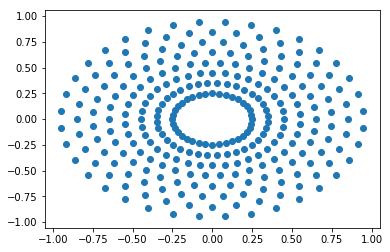

In [24]:
scatter(x,y)

In [25]:
# Create the Triangulation; no triangles so Delaunay triangulation created.
triang = tri.Triangulation(x, y)

Text(0.5,1,'triplot of Delaunay triangulation')

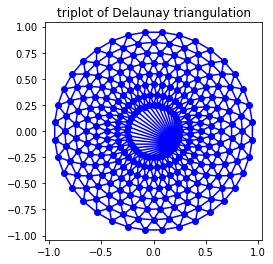

In [26]:
# Plot the triangulation.
plt.figure()
plt.gca().set_aspect('equal')
plt.triplot(triang, 'bo-')
plt.title('triplot of Delaunay triangulation')

Text(0.5,1,'triplot of Delaunay triangulation')

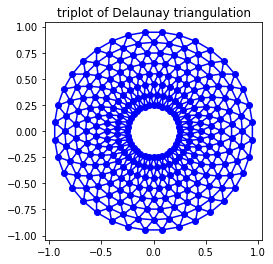

In [27]:
# Mask off unwanted triangles.
xmid = x[triang.triangles].mean(axis=1)
ymid = y[triang.triangles].mean(axis=1)
mask = np.where(xmid*xmid + ymid*ymid < min_radius*min_radius, 1, 0)
triang.set_mask(mask)

# Plot the triangulation.
plt.figure()
plt.gca().set_aspect('equal')
plt.triplot(triang, 'bo-')
plt.title('triplot of Delaunay triangulation')